# Working in SymPy

`SymPy` is a package for symbolic manipulation of expressions, equations, and calculus. The [website](https://docs.sympy.org/latest/index.html) for `SymPy` has tutorials explaining how things work. You can also use the `help()` and `dir()` functions to explore the properties of the `SymPy` package.

The way it is structured is that the different mathematical objects are defined with capital letters (e.g. `Symbol`, `Function`, `Matrix`) while the functions and utilities are defined with lower-case leading letters (e.g. `simplify`, `dsolve`).

### 1. **Basic Operations**

- `symbols()`: Define symbolic variables for expressions.
- `subs()`: Substitute values or expressions for variables.
- `sympify()`: Convert strings or Python objects to SymPy expressions.
- `evalf()`: Evaluate expressions to floating-point numbers.
- `lambdify()`: Convert symbolic expressions to numerical functions (supports backends like NumPy and SciPy).


### 2. **Simplifying Expressions**

- `simplify()`: Simplify general expressions (algebraic, trigonometric, etc.).
- `expand()`: Expand an expression (e.g., expand a polynomial or product).
- `factor()`: Factor expressions (e.g., factor a polynomial).
- `collect()`: Collect like terms in an expression.
- `apart()`: Partial fraction decomposition of rational expressions.
- `cancel()`: Cancel common factors in a rational function.
- `trigsimp()`: Simplify trigonometric expressions.
- `logcombine()`: Combine logarithmic terms into a single expression.
- `powsimp()`: Simplify powers and exponents.


### 3. **Calculus**

#### 3.1 Derivatives
- `diff()`: Compute derivatives of expressions (supports higher-order derivatives).

#### 3.2 Integrals
- `integrate()`: Compute symbolic integrals (both definite and indefinite).
- `integrate(f, (var, a, b))`: Compute definite integrals over an interval.
  
#### 3.3 Limits
- `limit()`: Compute the limit of an expression as a variable approaches a value.

#### 3.4 Series
- `series()`: Expand a function in a Taylor or Laurent series around a point.


### 4. **Linear Algebra**

- `Matrix()`: Define symbolic matrices.
- `det()`: Compute the determinant of a matrix.
- `inv()`: Compute the inverse of a matrix.
- `eigenvals()`: Compute eigenvalues of a matrix.
- `eigenvects()`: Compute eigenvectors of a matrix.
- `solve_linear_system()`: Solve a system of linear equations.
- `transpose()`: Transpose a matrix.
- `rref()`: Compute the reduced row echelon form of a matrix.


### 5. **Differential Equations**

- `dsolve()`: Solve ordinary differential equations (ODEs).
- `Function()`: Define a function that represents the solution of a differential equation.
- `Eq()`: Set up an equation (useful for defining differential equations).
- `classify_ode()`: Classify an ODE to determine its solution method.
- `checkodesol()`: Check whether a solution satisfies a given differential equation.


### 6. **Solving Equations**

- `solve()`: Solve algebraic equations (returns roots or solutions).
- `nonlinsolve()`: Solve systems of nonlinear equations.
- `linsolve()`: Solve systems of linear equations.
- `solvers.solvers.solve()`: A more general solver for symbolic equations.
- `solvers.decomp_ineq()`: Decompose inequalities for solving them.


### 7. **Polynomials**

- `Poly()`: Create a polynomial object for more control over polynomials.
- `degree()`: Get the degree of a polynomial.
- `roots()`: Find the roots of a polynomial.
- `gcd()`: Compute the greatest common divisor of polynomials.
- `lcm()`: Compute the least common multiple of polynomials.


### 8. **Trigonometry**

- `sin()`, `cos()`, `tan()`: Basic trigonometric functions.
- `asin()`, `acos()`, `atan()`: Inverse trigonometric functions.
- `expand_trig()`: Expand trigonometric expressions (e.g., using angle addition formulas).
- `trigsimp()`: Simplify trigonometric expressions.
- `rewrite()`: Rewrite trigonometric functions in terms of other functions (e.g., rewrite `sin(x)` in terms of exponential functions).


### Here's an example of how to solve a quadratic equation

In [1]:
import sympy as sp

# Define the symbolic variables
a, b, c, x = sp.symbols('a b c x')

# Define the quadratic equation: ax^2 + bx + c = 0
quadratic_eq = sp.Eq(a*x**2 + b*x + c, 0)

# Solve the quadratic equation for x
solutions = sp.solve(quadratic_eq, x)

# Display the solutions
solutions


[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

### Here's an example of how to solve a differential equation

In [2]:
import sympy as sp

# Define the symbolic variables and function
x, x0, y0, a, b = sp.symbols('x x0 y0 a b')  # Independent variable, constants, initial condition
y = sp.Function('y')(x)  # Dependent variable y as a function of x

# Define the first-order differential equation: a*y' + b*y = 0
diff_eq = sp.Eq(a * y.diff(x) + b * y, 0)

# Solve the differential equation
general_solution = sp.dsolve(diff_eq, y)

# Extract the solution for y(x)
solution_y = general_solution.rhs

# Apply the initial condition: y(x0) = y0
initial_condition = sp.Eq(solution_y.subs(x, x0), y0)

# Solve for the constant C1
C1_value = sp.solve(initial_condition, sp.symbols('C1'))[0]

# Substitute C1 back into the general solution
solution_with_ic = general_solution.subs(sp.symbols('C1'), C1_value)

# Display the solution with initial conditions
solution_with_ic


Eq(y(x), y0*exp(-b*x/a)*exp(b*x0/a))

## Assignment (1): Use `SymPy` to test the solutions we derived in class last week. 

$Q_{tr} = A e^-\gamma t cos\omega_\gamma t + N e^-\gamma t sin(\omega_\gamma t)$

and 

$Q_{st} = \bar{C} cos(\omega t - \phi)$

where

$\omega_\gamma = \omega_0^2 - \gamma^2$,

$\bar{C} = \frac{F_0/m}{\sqrt{(\omega_0^2-\omega^2)^2-4\gamma^2\omega^2}}$,

and

$\phi = \frac{2\gamma\omega}{\omega_0^2-\omega^2}$

In [16]:
import sympy as sp

A,B,omega0,omegag,gamma,t = sp.symbols('A,B,omega0,omegag,gamma,t', real=True)

Q=sp.Function('Q')(t)

diff_lhs = sp.diff(Q,t,2) +2*gamma*sp.diff(Q,t,1)+(omega0**2)*Q

Q_sol = sp.exp(-gamma*t)*(A*sp.cos(omegag*t)+B*sp.sin(omegag*t))
omegagexp= sp.sqrt(omega0**2-gamma**2)

diff_test = sp.diff(Q_sol,t,2)+2*gamma*sp.diff(Q_sol,t,1)+(omega0**2)*Q_sol
test = diff_test.subs(omegag,omegagexp).simplify().is_zero

test

############################################################################################################################

omega0,omegag,gamma,t,F_0,m,omega=sp.symbols('omega0,omegag,gamma,t,F_0,m,omega',real=True)
c=sp.symbols('c', complex=True)
Q=sp.Function('Q')(t)
F=sp.Function('F')(t)

diff_reff=sp.Eq(sp.diff(Q,t,2)+2*gamma*sp.diff(Q,t,1)+(omega0**2)*Q,F/m)

Q_sol_st = c*sp.exp(sp.I*omega*t)
driver_ex=(F_0/m)*sp.exp(sp.I*omega*t)
drive_real=sp.re(driver_ex)

diff_eq_sol=(sp.Eq(sp.diff(Q_sol_st,t,2)+2*gamma*sp.diff(Q_sol_st,t,1)+(omega0**2)*Q_sol_st,driver_ex))
c_sol=sp.solve(diff_eq_sol,c) [0]

Q_sol_real=sp.re(sp.expand_complex(c_sol*sp.exp(sp.I*omega*t)).simplify())

sp.Eq(sp.diff(Q_sol_real,t,2)+2*gamma*sp.diff(Q_sol_real,t,1)+(omega0**2)*Q_sol_real,drive_real).simplify()



True

## Assignment (2): Create representative plots of $\bar{C}$ and $\phi$ 


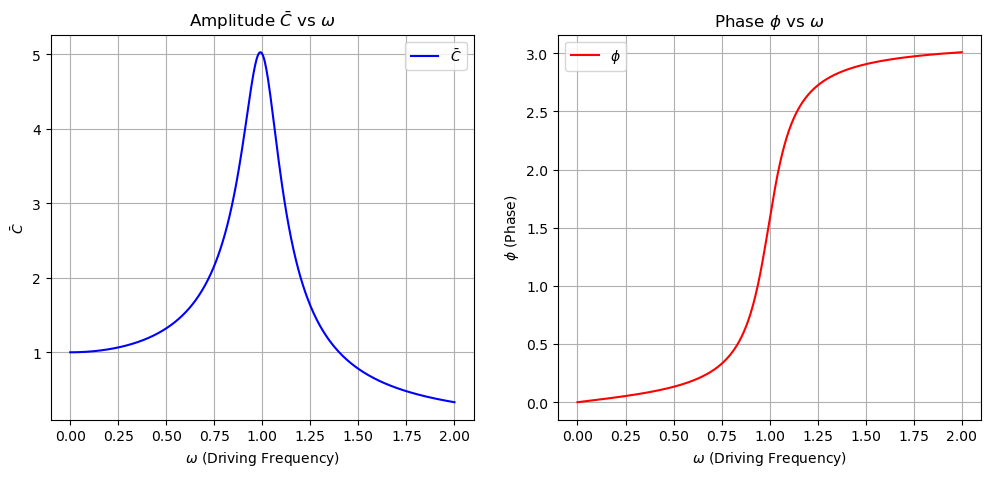

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the system
omega_0 = 1.0  # Natural frequency (arbitrary units)
gamma = 0.1    # Damping coefficient (arbitrary units)
F_0 = 1.0      # Driving force amplitude (arbitrary units)
m = 1.0        # Mass (arbitrary units)

# Frequency range for the driving frequency omega
omega = np.linspace(0, 2, 500)

# Compute C_bar and phi
C_bar = (F_0 / m) / np.sqrt((omega_0**2 - omega**2)**2 + (2 * gamma * omega)**2)
phi = np.arctan2(2 * gamma * omega, omega_0**2 - omega**2)

# Plotting C_bar vs. omega
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(omega, C_bar, label=r'$\bar{C}$', color='b')
plt.xlabel(r'$\omega$ (Driving Frequency)')
plt.ylabel(r'$\bar{C}$')
plt.title(r'Amplitude $\bar{C}$ vs $\omega$')
plt.grid(True)
plt.legend()

# Plotting phi vs. omega
plt.subplot(1, 2, 2)
plt.plot(omega, phi, label=r'$\phi$', color='r')
plt.xlabel(r'$\omega$ (Driving Frequency)')
plt.ylabel(r'$\phi$ (Phase)')
plt.title(r'Phase $\phi$ vs $\omega$')
plt.grid(True)
plt.legend()

plt.show()